# ERIS gvAPP Encircled energy calculation

M Kenworthy // Leiden Observatory


In [40]:
import numpy as np
from matplotlib import pyplot as plt
from hcipy import *
import matplotlib.pyplot as plt

from area import *

In [13]:
vAPP_phase = read_fits('ERIS_final_gvAPP.fits.gz')
ERIS_pupil = read_fits('ERIS_final_amplitude.fits.gz')

Nx = ERIS_pupil.shape[0]

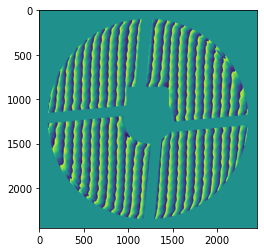

In [14]:
plt.imshow(vAPP_phase)
plt.show()

In [15]:
pupil_grid = make_pupil_grid(Nx)
focal_grid = make_focal_grid(6,50)

prop = FraunhoferPropagator(pupil_grid,focal_grid)

phase = Field(vAPP_phase.ravel(),pupil_grid)
pupil = Field(ERIS_pupil.ravel(),pupil_grid)

We make two PSFs, one with the telescope pupil, and one with the APP pattern in the pupil.

In [52]:
Ein_app = pupil * np.exp(1j * phase)

wf_app = Wavefront(Ein_app)

Ef_app_p = prop(wf_app)

PSF_app = Ef_app_p.intensity

In [53]:
Ein = pupil * np.exp(0 * phase)

wf = Wavefront(Ein)

Efp = prop(wf)

PSF = Efp.intensity
print(PSF.shaped.shape)

(600, 600)


Plot up the two PSFs and find their PSF centres

19.630504582609763
19.297210464559157


Text(0.5, 1.0, 'APP PSF')

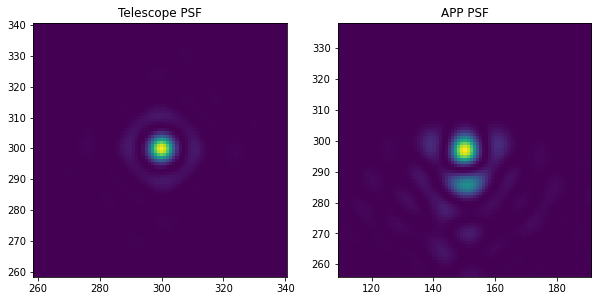

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

PSFs = PSF.shaped
PSF_apps = PSF_app.shaped

xn,yn = PSFs.shape
xc = (xn-1) / 2.
yc = (yn-1) / 2.

b = 41

xp = 150
yp = 297

ax1.imshow(PSFs)

ax2.imshow(PSF_apps)
print(np.sum(PSFs))
print(np.sum(PSF_apps))

ax1.set_xlim(xc-b,xc+b)
ax1.set_ylim(yc-b,yc+b)

ax2.set_xlim(xp-b,xp+b)
ax2.set_ylim(yp-b,yp+b)

ax1.set_title("Telescope PSF")
ax2.set_title("APP PSF")


Define a simple aperture and sum up the flux for both PSFs, then calculate the encircled energy fraction:

encircled energy fraction in r=7 pixel aperture is 0.549


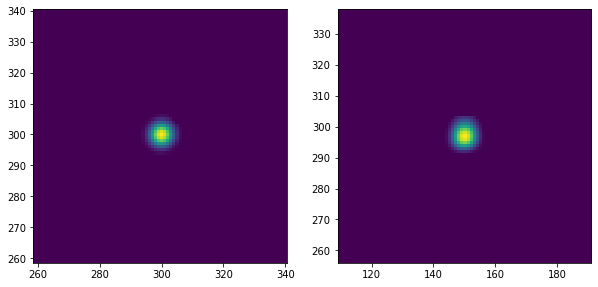

In [58]:
r=7

(rc, _) = rtheta(PSFs, xc, yc)
(rp, _) = rtheta(PSF_apps, xp, yp)
mc = (rc < r)
mp = (rp < r)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.imshow(PSFs*mc)

ax2.imshow(PSF_apps*mp)

ax1.set_xlim(xc-b,xc+b)
ax1.set_ylim(yc-b,yc+b)

ax2.set_xlim(xp-b,xp+b)
ax2.set_ylim(yp-b,yp+b)

fc = np.sum(PSFs*mc)
fp = np.sum(PSF_apps*mp)

eefrac = fp/fc

print(f'encircled energy fraction in r={r} pixel aperture is {eefrac:5.3f}')